## Image Blending and Pasting
***
### Blending - numpy
Basic image blending involves blending two images of the same dimensions together, with each image contributing a certain amount of intensity to the result. This demonstration will involve blending the opencv logo with a magenta background.

In [1]:
# notebook imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

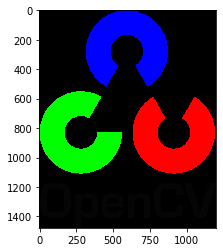

In [35]:
opencv_logo = cv2.imread('../Image_Data/Opencv_Logo.png')
plt.imshow(opencv_logo)

In [47]:
# setting up background - (239, 66, 245) is a magenta color
background = np.ones(np.shape(opencv_logo), dtype='uint8')
background[:,:,0:1] = background[:, :, 0:1] * 239
background[:,:, 1:2] = background[:, :, 1:2] * 66
background[:, :, 2:3] = background[:, :, 2:3] * 245

Once the two sources are set up and are of the same dimension, the two images can be blended together using the following equation: dst = src1*alpha + src2*beta + gamma.

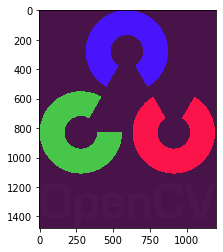

In [48]:
# blending 2 images together
blended_logo = ((0.7*opencv_logo) + (0.3*background) + 0)
blended_logo = blended_logo.astype(int)
plt.imshow(blended_logo)

The resulting image now has a magenta tint applied to it.

In [39]:
# Blending - opencv snytax

***
### Blending - opencv
The background image can be reused and applied to the addWeighted() method that opencv provides to perform this basic blending operation.

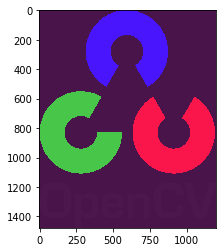

In [50]:
blended_logo_opencv = cv2.addWeighted(src1=opencv_logo, alpha=0.7, src2=background, beta=0.3, gamma=0)
plt.imshow(blended_logo_opencv)

Uppon inspecting the two ways of performing basic blending:

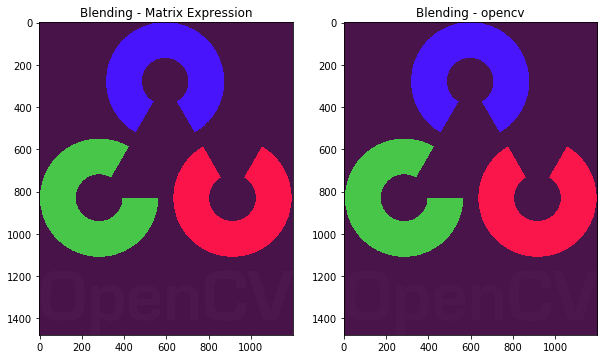

In [57]:
fig, axarr = plt.subplots(1, 2, figsize=(10, 10))
axarr[0].set_title('Blending - Matrix Expression')
axarr[0].imshow(blended_logo)
axarr[1].set_title('Blending - opencv')
axarr[1].imshow(blended_logo_opencv)

The resulting image produced by both methods is exactly the same.

***
### Pasting
Pasting is exactly as it sounds. Pasting is the placement of one image on top of another. This can be done easily using numpy. In the following example, a red border will be applied to the opencv logo by first creating a red background image slightly larger than the logo, and placing the opencv logo image on top of that background.

In [63]:
red_bg = np.zeros((100+len(opencv_logo), 100+len(opencv_logo[0]), 3), dtype='uint8')
red_bg[:, :, 0] = red_bg[:, :, 0] + 255

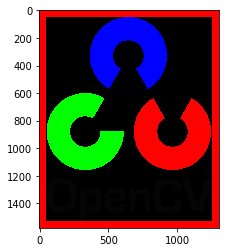

In [66]:
bordered_logo = red_bg.copy()
bordered_logo[50:len(opencv_logo)+50, 50:len(opencv_logo[0])+50] = opencv_logo
plt.imshow(bordered_logo)

***
### References
* <a href="https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#addweighted">addWeighted Documentation</a>
***